# What this Notebook Contains ?
### This notebook contains the analysis of tweets and their effects on Stock Values of companies.<br><br>The companies in consideration are Amazon, Apple, Tesla, Google and Microsoft

# Procedure:
#### 1. Preliminary Introspection of the data <br><br>2. Data Cleaning<br><br>3. Data Engineering<br><br>4. Data Analysis

# 1. Preliminary Introspection of the data

# Starter Kit:
* Loading Libraries
* Creating Sentiment Analysis Function
* Loading DataFrames

#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from varname import nameof

#### Creating Sentiment Analysis

In [2]:
# For sentiment analysis, we use VADER library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Sentiment Analysis function
def sentiment_analysis(tweet):
    score = sid.polarity_scores(tweet)["compound"]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shoun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Loading DataFrames

In [3]:
# changing the directory to read the database
os.chdir(r"S:\Coding\Datasets\effect of Tweets on companies")

# reading the database
raw_company_db = pd.read_csv("Company.csv")
raw_company_tweet_db = pd.read_csv("Company_Tweet.csv")
raw_tweet_db = pd.read_csv("Tweet.csv")
raw_companyvalue_db = pd.read_csv("CompanyValues.csv")

## Viweing the Raw DataFrames

In [4]:
raw_company_db.head(2)

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc


In [5]:
raw_company_tweet_db.head(2)

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL


In [6]:
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0


In [7]:
raw_companyvalue_db.head(2)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63


# 2. Data Cleaning

#### Merging the DataFrames to form one single DataFrame

In [8]:
# Part1: Merge raw_company_tweet_db, raw_company_db
raw_company_tweet_db = pd.merge(raw_company_tweet_db, raw_company_db,on='ticker_symbol')

# Part2: Merge raw_company_tweet_db, raw_company_db
raw_tweet_db = pd.merge(raw_tweet_db, raw_company_tweet_db, on="tweet_id")

In [9]:
# Veiwing the marged Dataframe 
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple


In [10]:
# Saving the names of dataframes so we can use it if required in future
raw_tweet_db.name = nameof(raw_tweet_db)
raw_companyvalue_db.name = nameof(raw_companyvalue_db)

In [11]:
list_df = [raw_tweet_db, raw_companyvalue_db]

In [12]:
# Let us check the number of rows and columns in the dataframes
[print(f"For Dataframe {df.name}\nNumber of Rows are {df.shape[0]}\nNumber of Columns are {df.shape[1]}\n\n") for df in list_df]

For Dataframe raw_tweet_db
Number of Rows are 4336445
Number of Columns are 9


For Dataframe raw_companyvalue_db
Number of Rows are 17528
Number of Columns are 7




[None, None]

#### Missing values check: Let us check if there are any missing values

In [13]:
[print(f"For DataFrame {df.name}, we have missing values check as\n{df.isna().sum()}\n\n") for df in list_df]

For DataFrame raw_tweet_db, we have missing values check as
tweet_id             0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
company_name         0
dtype: int64


For DataFrame raw_companyvalue_db, we have missing values check as
ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
dtype: int64




[None, None]

In [14]:
# From the above, we see that dataframe raw_tweet_db has 55919 missing values in column 'writer'.
# So we will replace it with the name 'anonymous'

In [15]:
raw_tweet_db.writer = raw_tweet_db.writer.fillna('anonymous')

In [16]:
# let us check if all null values are replaced
raw_tweet_db.isna().sum()

tweet_id         0
writer           0
post_date        0
body             0
comment_num      0
retweet_num      0
like_num         0
ticker_symbol    0
company_name     0
dtype: int64

In [17]:
# So all missing vlaues are replaced by 'anonymous'

#### let us check the data types of columns

In [18]:
[print(f"for DataFrame {df.name}\n{df.info()}\n") for df in list_df]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   writer         object
 2   post_date      int64 
 3   body           object
 4   comment_num    int64 
 5   retweet_num    int64 
 6   like_num       int64 
 7   ticker_symbol  object
 8   company_name   object
dtypes: int64(5), object(4)
memory usage: 330.8+ MB
for DataFrame raw_tweet_db
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dt

[None, None]

# 3. Data Engineering

### We will convert:<br>'post_date' column in raw_tweet_db & <br>'day_date' column in raw_companyvalue_db to<br>to datetime for further processing

In [19]:
raw_tweet_db.post_date = pd.to_datetime(raw_tweet_db.post_date, unit="s")
raw_companyvalue_db.day_date = pd.to_datetime(raw_companyvalue_db.day_date)

In [20]:
raw_companyvalue_db.head(2)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63


In [21]:
# for checking the chronologically first tweet in the dataframe, we sort the dataframe by date column
raw_tweet_db.sort_values(by="post_date", inplace=True)
raw_companyvalue_db.sort_values(by="day_date", inplace=True)

In [22]:
# Let us view the head and tail of the dataframe to see the start and end dates

In [23]:
raw_tweet_db.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com


In [24]:
raw_tweet_db.tail(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Microsoft
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,apple
4336444,1212160477159206912,treabase,2019-12-31 23:55:53,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,apple


In [25]:
raw_companyvalue_db.head(3)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302


In [26]:
raw_companyvalue_db.tail(3)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
11378,MSFT,2020-05-29,183.25,42146720,182.73,184.27,180.4100
3085,AMZN,2020-05-29,2442.37,3529329,2415.94,2442.37,2398.1973
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700


## Viweing the dates at the head and tail end of the dataframe, we see that:
#### a. starting date to considered as 1 Jan 2015
#### b. last tweet in raw_tweet_db dataframe was tweeted on 31 Dec 2019 
#### c. but the stock values are given till 29 May 2020.

#### So we will drop the values for the year 2020.

In [27]:
raw_companyvalue_db = raw_companyvalue_db[raw_companyvalue_db.day_date < "2020-01-01"]

In [28]:
raw_companyvalue_db.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
3188,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.230
6273,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.130
9358,GOOG,2019-12-31,1337.02,962468,1330.11,1338.00,1329.085
11481,MSFT,2019-12-31,157.70,18393380,156.77,157.77,156.450
14566,TSLA,2019-12-31,418.33,10292460,405.00,421.29,402.080


### We will add additional columns to raw_companyvalue_db which we will need in future for checking the stock value performance

In [29]:
# Let us add column to the stock price dataframe which shows the max stock price fluctuation
raw_companyvalue_db['fluctuation'] = raw_companyvalue_db.high_value - raw_companyvalue_db.low_value

# Let us add column to the stock price dataframe which shows the net rise in stock price
raw_companyvalue_db['price_gain'] = raw_companyvalue_db.close_value - raw_companyvalue_db.open_value

# Let us add column to the stock price dataframe which shows the total valuation at the end of the day
raw_companyvalue_db['total_valuation_EOD'] = raw_companyvalue_db.volume * raw_companyvalue_db.close_value

<ipython-input-29-69a1f3a09aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_companyvalue_db['fluctuation'] = raw_companyvalue_db.high_value - raw_companyvalue_db.low_value
<ipython-input-29-69a1f3a09aa9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_companyvalue_db['price_gain'] = raw_companyvalue_db.close_value - raw_companyvalue_db.open_value
<ipython-input-29-69a1f3a09aa9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [30]:
raw_companyvalue_db.head(3)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,fluctuation,price_gain,total_valuation_EOD
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200,3.5520,-1.7300,4.499075e+08
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,0.9971,0.1628,8.139961e+09
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302,5.5263,0.9799,6.492019e+08


In [31]:
raw_tweet_db.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com


### Applying sentiment analysis to the tweets:

In [32]:
raw_tweet_db['sentiment'] = raw_tweet_db['body'].apply(lambda x : sentiment_analysis(x))

In [33]:
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,sentiment
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple,neutral
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple,negative


### Adding a column specifying the trending score of every tweet considering the retweet count, likes and comments for that tweet

In [34]:
# Considering there is a 'comment,  retweet & like' column, we can consider those tweets having the same sentiments
# So for counting the total number of tweets, we add a count column telling the trending score of the tweet which will be addition of all these 3 columns
# Adding 1 to trend score as tweet itself is one of the contributors to itself

raw_tweet_db.insert(7, "trend_score", raw_tweet_db.comment_num + raw_tweet_db.retweet_num + raw_tweet_db.like_num + 1)

In [35]:
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,trend_score,ticker_symbol,company_name,sentiment
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2,AAPL,apple,neutral
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,1,AAPL,apple,negative


### Let us work on merging the 2 dataframes. For that, we need an anchor column to merge on

In [36]:
# Creating Anchor Column for raw_tweet_db
raw_tweet_db.insert(3, "date_str", raw_tweet_db.post_date.astype("str").str.split(" "))
raw_tweet_db.date_str = [element[0] for element in raw_tweet_db.date_str]
raw_tweet_db.insert(0, "anchor", raw_tweet_db.date_str + raw_tweet_db.ticker_symbol)

# Creating Anchor Column for raw_companyvalue_db
raw_companyvalue_db.insert(
    2, "date_str", raw_companyvalue_db.day_date.astype("str").str.split(" ")
)
raw_companyvalue_db.date_str = [element[0] for element in raw_companyvalue_db.date_str]
raw_companyvalue_db.insert(
    0, "anchor", raw_companyvalue_db.date_str + raw_companyvalue_db.ticker_symbol
)

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
# Merging the two dataframe
processed_db = pd.merge(raw_tweet_db, raw_companyvalue_db, on="anchor")

In [38]:
# Let us convert he string date column "date_str_x" to datetime
processed_db.date_str_x = pd.to_datetime(processed_db.date_str_x)

In [39]:
# Since we are aiming to see the impact of tweets on stock value (i.e. rise and fall), we can drop "neutral" sentiments
processed_db = processed_db[processed_db.sentiment != "neutral"]

## Making a clean database

In [40]:
# Let us make a clean dataset with only the desired values
clean_db = processed_db[
    [
        "post_date",
        "date_str_x",
        "body",
        "trend_score",
        "ticker_symbol_x",
        "company_name",
        "sentiment",
        "close_value",
        "volume",
        "open_value",
        "high_value",
        "low_value",
        "fluctuation",
        "price_gain",
        "total_valuation_EOD"
    ]
]

In [41]:
# Let us check how many companies do we have in our dataset

print(
    f"In our dataset, we have total {len(clean_db.company_name.value_counts())} companies, namely\n{clean_db.company_name.value_counts()}"
)

In our dataset, we have total 5 companies, namely
apple         766284
Tesla Inc     713096
Amazon.com    426805
Google Inc    357474
Microsoft     188850
Name: company_name, dtype: int64


In [42]:
# Let us check by ticker symbol
clean_db.ticker_symbol_x.value_counts()

AAPL     766284
TSLA     713096
AMZN     426805
MSFT     188850
GOOG     180718
GOOGL    176756
Name: ticker_symbol_x, dtype: int64

In [43]:
# after checking the ticker symbol, we see that Google Inc has 2 ticker symbols: GOOG and GOOGL
# Let us change that so all Google Inc tickers have the same symbol as GOOG
clean_db.ticker_symbol_x.replace("GOOGL", "GOOG", inplace=True)

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [44]:
# Let us make datasets for these 5 companies
apple_df = clean_db[clean_db.ticker_symbol_x == "AAPL"]
tesla_df = clean_db[clean_db.ticker_symbol_x == "TSLA"]
amazon_df = clean_db[clean_db.ticker_symbol_x == "AMZN"]
google_df = clean_db[clean_db.ticker_symbol_x == "GOOG"]
microsoft_df = clean_db[clean_db.ticker_symbol_x == "MSFT"]

In [45]:
# For simplicity, we will further form 2 sub dataframes per company based on the sentiments: positive and negative

pos_apple_df = apple_df[apple_df.sentiment == "positive"]
pos_tesla_df = tesla_df[tesla_df.sentiment == "positive"]
pos_amazon_df = amazon_df[amazon_df.sentiment == "positive"]
pos_google_df = google_df[google_df.sentiment == "positive"]
pos_microsoft_df = microsoft_df[microsoft_df.sentiment == "positive"]
neg_apple_df = apple_df[apple_df.sentiment == "negative"]
neg_tesla_df = tesla_df[tesla_df.sentiment == "negative"]
neg_amazon_df = amazon_df[amazon_df.sentiment == "negative"]
neg_google_df = google_df[google_df.sentiment == "negative"]
neg_microsoft_df = microsoft_df[microsoft_df.sentiment == "negative"]

In [46]:
# Let us create dataset with limited values that give us a brief info about rise and fall in total valuation of the company over time

ovr_pos_apple_df = pos_apple_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_tesla_df = pos_tesla_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_amazon_df = pos_amazon_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_google_df = pos_google_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_microsoft_df = pos_microsoft_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})

ovr_neg_apple_df = neg_apple_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_tesla_df = neg_tesla_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_amazon_df = neg_amazon_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_google_df = neg_google_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_microsoft_df = neg_microsoft_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})

# 4. Data Analysis

## Tesla

### Let us analyse for Tesla
### We will analyse effect of Positive Tweets on Valuation

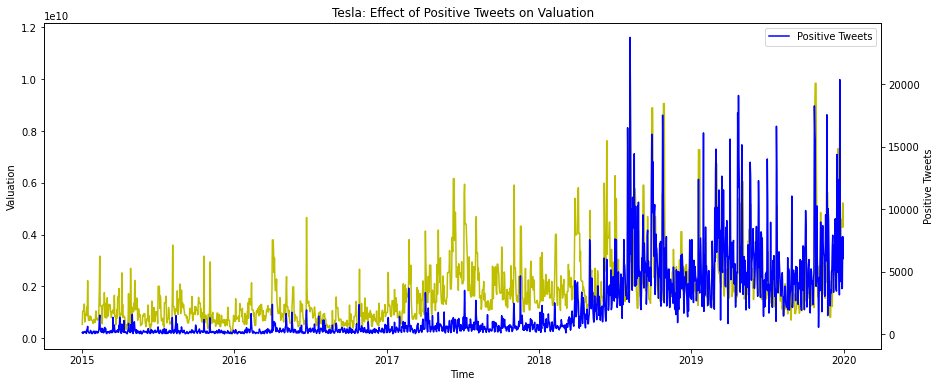

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Positive Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_tesla_df.date_str_x,
    ovr_pos_tesla_df.total_valuation_EOD,
    color="y",
    label="Valuation",
)
ax2.plot(
    ovr_pos_tesla_df.date_str_x,
    ovr_pos_tesla_df.trend_score,
    color="b",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

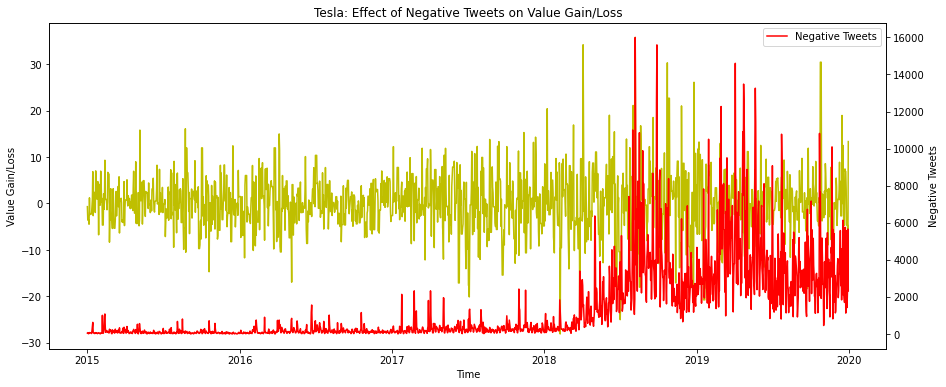

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.price_gain,
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### We see that it becomes difficult to understand the effect of negative tweets on stock price. Hence, let us plot by taking the log values of "price_gain"

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


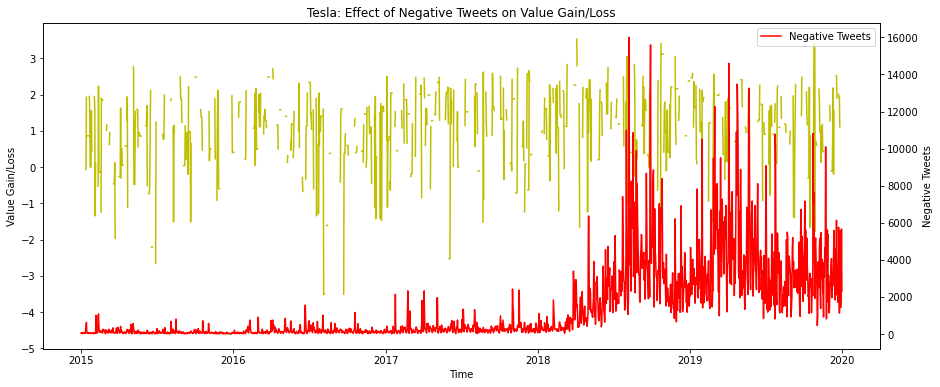

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_tesla_df.date_str_x,
    np.log(ovr_neg_tesla_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

#### Taking logs seems to provide better viewing of the graph. Hence, we will take log values of 'price_gain' column while plotting

### From the above graph we see that where there is a spike in Negative Tweets, 
### the price gain is negative i.e. there is drop in valuation

### We can conclude that Tesla's valuation is affected by Tweets

## Apple

### Let us analyse for Apple

### We will analyse effect of Positive Tweets on Valuation

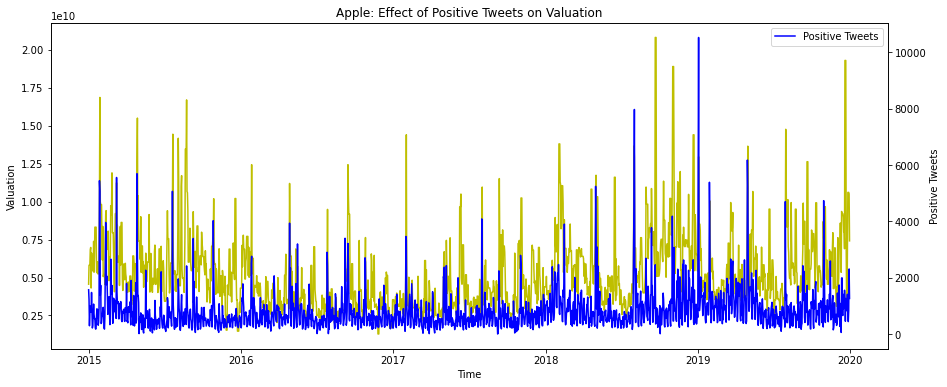

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Positive Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_apple_df.date_str_x,
    ovr_pos_apple_df.total_valuation_EOD,
    color="y",
    label="Valuation",
)
ax2.plot(
    ovr_pos_apple_df.date_str_x,
    ovr_pos_apple_df.trend_score,
    color="b",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


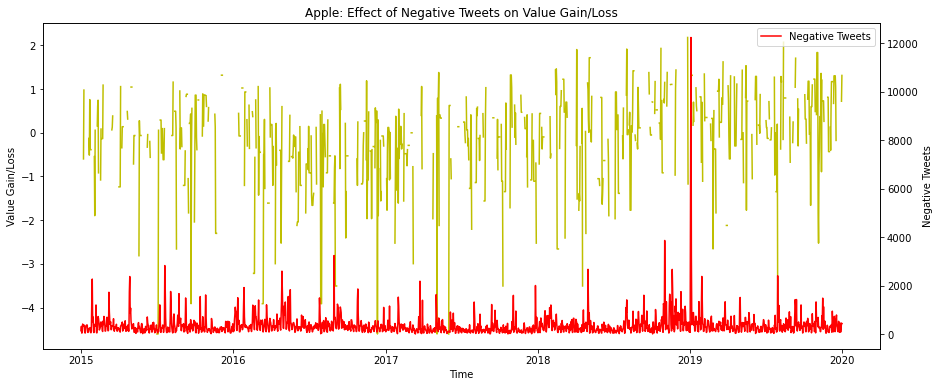

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_apple_df.date_str_x,
    np.log(ovr_neg_apple_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_apple_df.date_str_x,
    ovr_neg_apple_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### From the above graph we see that there is no proper correlation between negative tweets and drop in Apple share value
### We can conclude that Apple's valuation is affected only by Positive Tweets

## Amazon

### Let us analyse for Amazon

### We will analyse effect of Positive Tweets on Valuation

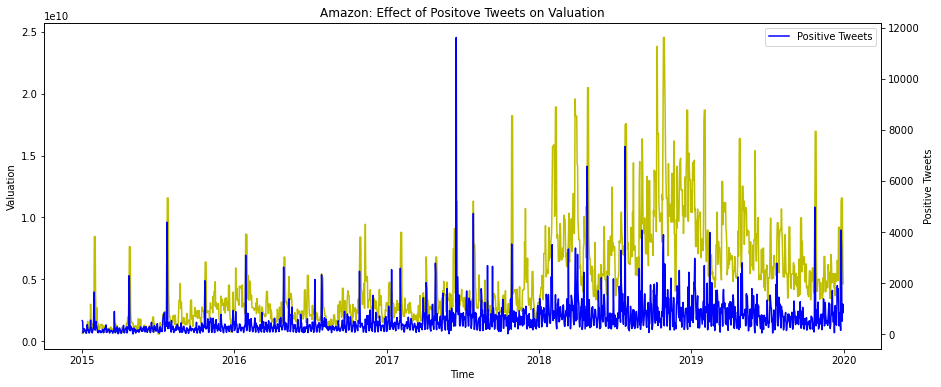

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Amazon: Effect of Positove Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_amazon_df.date_str_x,
    ovr_pos_amazon_df.total_valuation_EOD,
    color="y",
    label="Valuation",
)
ax2.plot(
    ovr_pos_amazon_df.date_str_x,
    ovr_pos_amazon_df.trend_score,
    color="b",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


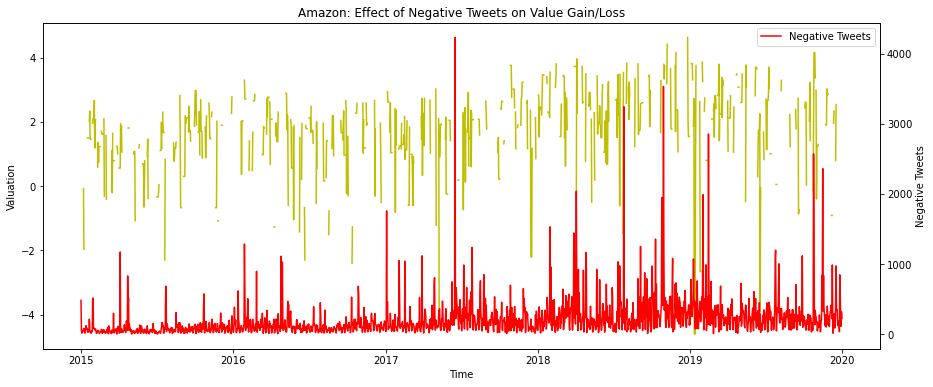

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Amazon: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_amazon_df.date_str_x,
    np.log(ovr_neg_amazon_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_amazon_df.date_str_x,
    ovr_neg_amazon_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### From the above graph we see that where there is a spike in Negative Tweets,
### the price gain is negative i.e. there is drop in valuation

### We can conclude that Amazon's valuation is affected by Tweets

## Google

### Let us analyse for Google

### We will analyse effect of Positive Tweets on Valuation

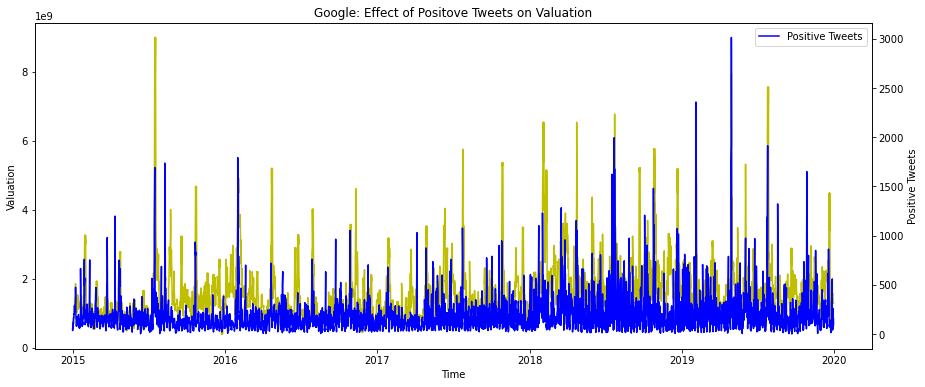

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Google: Effect of Positove Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_google_df.date_str_x,
    ovr_pos_google_df.total_valuation_EOD,
    color="y",
    label="Valuation",
)
ax2.plot(
    ovr_pos_google_df.date_str_x,
    ovr_pos_google_df.trend_score,
    color="b",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


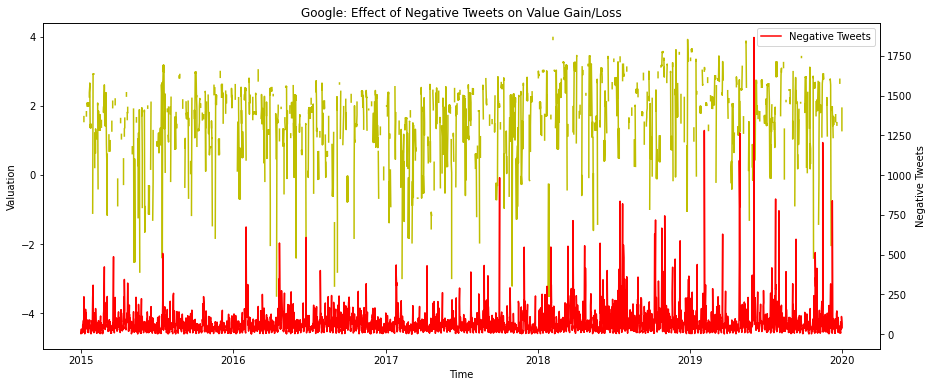

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Google: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_google_df.date_str_x,
    np.log(ovr_neg_google_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_google_df.date_str_x,
    ovr_neg_google_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### From the above graph we see that generally where there is a spike in Negative Tweets, 
### the price gain is negative i.e. there is drop in valuation

### We can conclude that Google's valuation is affected by Tweets

# Microsoft

### Let us analyse for Microsoft

### We will analyse effect of Positive Tweets on Valuation

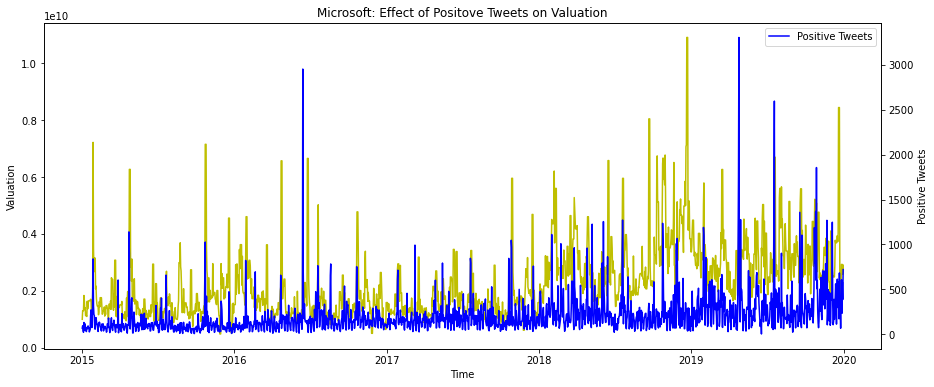

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Microsoft: Effect of Positove Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_microsoft_df.date_str_x,
    ovr_pos_microsoft_df.total_valuation_EOD,
    color="y",
    label="Valuation",
)
ax2.plot(
    ovr_pos_microsoft_df.date_str_x,
    ovr_pos_microsoft_df.trend_score,
    color="b",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


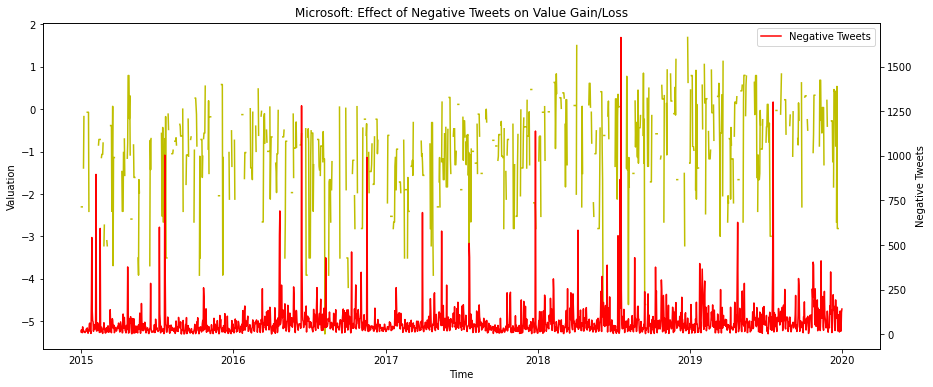

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Microsoft: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_microsoft_df.date_str_x,
    np.log(ovr_neg_microsoft_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_microsoft_df.date_str_x,
    ovr_neg_microsoft_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### From the above graph we see that generally where there is a spike in Negative Tweets, 
### the price gain is negative i.e. there is drop in valuation

### We can conclude that Microsoft's valuation is affected by Tweets

# Conclusion

## From analysing the given data, we conclude that:
* Positive Tweet Spikes (high trending) coincide with rise in stock value
* Negative Tweet Spikes (high trending) overall coincide with drop in stock value, however it is not as obvious as Positive Tweets
* (Naturally) there are also other factors contributing to rise/fall of stock values as we see no relation to rise/fall of stock value with low-medium trending tweets.

##### Notebook by = Shounak Deshpande (shounak.python@gmail.com)
* LinkedIn: https://www.linkedin.com/in/shounak-deshpande-ab80b0105/
* GitHub: https://github.com/shounak8
* Website: https://indomitable-tech.herokuapp.com/
##### Please leave a critical feedback so I can improve 😁